In [1]:
import numpy as np
import matplotlib.pyplot as plt
import intelligent_warehouse as iw
import random
import copy
%load_ext autoreload
%autoreload 2

In [2]:
xm = 25
ym = 20
m = np.zeros((ym, xm), int)

#note shelf as 1 
for i in [3, 7, 11, 15]:
    for j in [4, 11, 18]:
        m[i:i + 2, j:j + 5] = 1
        
#note cargoin as 2, cargoout as 3
for i in [7, 14, 21]:
    m[0, i] = 2
    m[19, i] = 3

#note charging area as 4
m[3:18, 0:1] = 4

#note inshelf as 5
for i in [3, 7, 11, 15]:
    for j in [9, 16, 23]:
        m[i, j] = 5

In [3]:
#car=[(0,1)current loc, 2 battery, 3 whether free, (4,5)mission start loc, 
#(6,7)mission end loc, 8 whether carry cargo, 9whether have path, 10：0 not charge, 1 on the way, 2 on charging, 11 car_id]
car1 = [0, 3, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0]
car2 = [0, 5, 100, 0, 0, 0, 0, 0, 0, 0, 0, 1]
car3 = [0, 7, 100, 0, 0, 0, 0, 0, 0, 0, 0, 2]
car4 = [0, 9, 100, 0, 0, 0, 0, 0, 0, 0, 0, 3]
car5 = [0, 11, 100, 0, 0, 0, 0, 0, 0, 0, 0, 4]
car6 = [0, 13, 100, 0, 0, 0, 0, 0, 0, 0, 0, 5]
car7 = [0, 15, 100, 0, 0, 0, 0, 0, 0, 0, 0, 6]
car8 = [0, 17, 100, 0, 0, 0, 0, 0, 0, 0, 0, 7]

carall = [car1, car2, car3, car4, car5, car6, car7, car8]

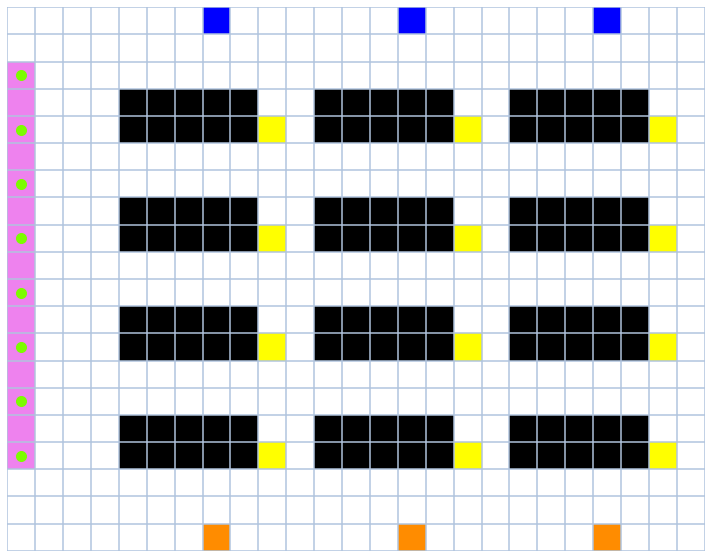

In [4]:
iw.drawmap(m, carall)

In [17]:
def createmission(n_mission = 10, file = "mission.txt"):
    f = open(file,"w")
    mission = []
    for i in range(n_mission):
        loc = str(random.randint(1, 6))
        cargo = str(random.randint(1, 12))
        mission.append([loc, cargo])
    for i in mission:
        i = str(i).strip('[').strip(']').replace(',','').replace('\'','')+'\n'
        f.write(i)
    

In [20]:
createmission(10)

In [21]:
mission = iw.getmission("mission.txt")
mission

[[1, 9],
 [4, 10],
 [6, 8],
 [4, 1],
 [3, 4],
 [2, 4],
 [4, 6],
 [1, 5],
 [4, 2],
 [2, 3]]

In [22]:
shelf = np.random.randint(5,size = 12)

In [23]:
shelf

array([0, 1, 2, 0, 4, 1, 2, 1, 2, 2, 1, 2])

In [24]:
#检测任务能否完成，若无法完成，安排进货
new_mission = []
for i in range(len(mission)):
    if mission[i][0] > 3 and shelf[mission[i][1]-1] == 0:
        print('货架'+str(mission[i][1])+'无货,任务'+str(i+1)+'无法完成')
        new_mission.append(mission[i])
        iw.purchase(mission[i][1], new_mission)
    else:
        new_mission.append(mission[i])
        if mission[i][0] <= 3:
            shelf[mission[i][1]-1] += 1
        else:
            shelf[mission[i][1]-1] -= 1
        print('任务'+str(i+1)+'可完成')
mission = new_mission

任务1可完成
任务2可完成
任务3可完成
货架1无货,任务4无法完成
请输入进货拣货台编号（1-3）：3
任务5可完成
任务6可完成
任务7可完成
任务8可完成
任务9可完成
任务10可完成


In [25]:
shelf

array([0, 0, 3, 2, 5, 0, 2, 0, 3, 1, 1, 2])

In [26]:
mission

[[3, 1],
 [1, 9],
 [4, 10],
 [6, 8],
 [4, 1],
 [3, 4],
 [2, 4],
 [4, 6],
 [1, 5],
 [4, 2],
 [2, 3]]

In [27]:
iw.add_mission(shelf, mission)

请输入添加的任务类型（0：入库，1：出库）0
请输入拣货台编号（1-3）：2
请输入货架编号（1-12）：8
添加完成


In [28]:
iw.add_mission(shelf, mission)

请输入添加的任务类型（0：入库，1：出库）1
请输入拣货台编号（4-6）：5
请输入货架编号（1-12）：2
库存不足
是否需要进货（不需要：0，需要：1）：1
请输入进货拣货台编号（1-3）：3
添加完成


In [29]:
mission

[[3, 2],
 [3, 1],
 [1, 9],
 [4, 10],
 [6, 8],
 [4, 1],
 [3, 4],
 [2, 4],
 [4, 6],
 [1, 5],
 [4, 2],
 [2, 3],
 [2, 8],
 [5, 2]]

In [30]:
iw.del_mission(mission)

请输入要删除任务的拣货台编号：4
请输入要删除任务的货架编号：2
删除成功


In [31]:
mission

[[3, 2],
 [3, 1],
 [1, 9],
 [4, 10],
 [6, 8],
 [4, 1],
 [3, 4],
 [2, 4],
 [4, 6],
 [1, 5],
 [2, 3],
 [2, 8],
 [5, 2]]

In [34]:
#car=[(0,1)current loc, 2 battery, 3 whether free, (4,5)mission start loc, 
#(6,7)mission end loc, 8 whether carry cargo, 9whether have path, 10：0 not charge, 1 on the way, 2 on charging, 11 car_id]
car1 = [0, 3, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0]
car2 = [0, 5, 100, 0, 0, 0, 0, 0, 0, 0, 0, 1]
car3 = [0, 7, 100, 0, 0, 0, 0, 0, 0, 0, 0, 2]
car4 = [0, 9, 100, 0, 0, 0, 0, 0, 0, 0, 0, 3]
car5 = [0, 11, 100, 0, 0, 0, 0, 0, 0, 0, 0, 4]
car6 = [0, 13, 100, 0, 0, 0, 0, 0, 0, 0, 0, 5]
car7 = [0, 15, 100, 0, 0, 0, 0, 0, 0, 0, 0, 6]
car8 = [0, 17, 100, 0, 0, 0, 0, 0, 0, 0, 0, 7]

carall = [car1, car2, car3, car4, car5, car6, car7, car8]

t = 0
n_mission = len(mission)
m_appoint = 0
m_complete = 0
s = [0 for i in range(len(carall))]
path = [[] for i in range(len(carall))]
busy = []
record = [[] for i in range(len(carall))]#car record
ar = [0]#appointment record
cr = [0]#complete record


for i in range(len(carall)):
    record[i].append([carall[i][0], carall[i][1], carall[i][2], carall[i][8], carall[i][10]])
    
while m_complete < n_mission or path != [[] for i in range(len(carall))]:
    #print(t)
    
    # appoint missions
    while m_appoint < n_mission:
        car_id = iw.appoint(mission[m_appoint], carall)
        
        if car_id != -1:
            carall[car_id][3] = 1
            m_appoint += 1
        else:
            break
        
    
    for i in range(len(carall)):
        
        #find path for cars which just get appointment
        if carall[i][3] == 1 and carall[i][9] == 0:
            # Consider More Subtle Cases which related to pushing
            iw.findpath_ultimate(carall, i, path)
            
            carall[i][9] = 1
            
        #if car reaches the start point, change car[8]
        if carall[i][0] == carall[i][4] and carall[i][1] == carall[i][5]:
            if carall[i][10] == 0:
                carall[i][8] = 1
                s[i] = 1
            
        #if car reaches the end point
        if carall[i][0] == carall[i][6] and carall[i][1] == carall[i][7]:
            if carall[i][10] == 0 and s[i] == 1:
                s[i] = 0
                carall[i][3] = 0
                carall[i][8] = 0
                carall[i][9] = 0
                m_complete += 1
                print('misssion complete')
                print(i)
                #all the missions have been appointed or low battery, go back to the closest charging area
                if m_appoint == n_mission or carall[i][2] < 30:
                    iw.charge(carall[i], path, busy, carall)
            elif carall[i][10]== 1:
                carall[i][10] = 2
                carall[i][4] = 0
                carall[i][5] = 0
                carall[i][6] = 0
                carall[i][7] = 0
        if m_appoint == n_mission and carall[i][3] == 0 and carall[i][10] == 0:
            iw.charge(carall[i], path, busy, carall)
        
        
        #move cars
        if path[i] != []:
            carall[i][0], carall[i][1] = int(path[i][0][0]), int(path[i][0][1])
            del(path[i][0])
        
        record[i].append([carall[i][0], carall[i][1], carall[i][2], carall[i][8], carall[i][10]])    
        
        #battery
        if carall[i][8] == 0:
            carall[i][2] -= 0.5
        elif carall[i][8] == 1:
            carall[i][2] -= 1
        if carall[i][10] == 2:
            carall[i][2] += 5
            if carall[i][2] >= 100:
                carall[i][2] = 100
                if m_appoint < n_mission:
                    busy.remove(carall[i][1])
                    carall[i][10] = 0
                
    t += 1
    ar.append(m_appoint)
    cr.append(m_complete)

Other cars are all idle


E:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
E:\anaconda\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Try 1
The end node is blocked!! Wait!!
[(3.0, 3.0), (4.0, 2.0), (5.0, 2.0), (6.0, 2.0), (7.0, 2.0), (8.0, 2.0), (9.0, 2.0), (10.0, 2.0), (11.0, 2.0), (12.0, 2.0), (13.0, 2.0), (14.0, 2.0), (15.0, 2.0), (16.0, 2.0), (17.0, 2.0), (18.0, 2.0)]
[0, 5, 100, 1, 21, 0, 9, 3, 0, 0, 0, 1]
[(3.0, 3.0), (4.0, 2.0), (5.0, 2.0), (6.0, 2.0), (7.0, 2.0), (8.0, 2.0), (9.0, 2.0), (10.0, 2.0), (11.0, 2.0), (12.0, 2.0), (13.0, 2.0), (14.0, 2.0), (15.0, 2.0), (16.0, 2.0), (17.0, 2.0), (18.0, 2.0), (21.0, 0.0)]
Try 2
The end node is blocked!! Wait!!
[(3.0, 3.0), (4.0, 2.0), (5.0, 2.0), (6.0, 2.0), (7.0, 2.0), (8.0, 2.0), (9.0, 2.0), (10.0, 2.0), (11.0, 2.0), (12.0, 2.0), (13.0, 2.0), (14.0, 2.0), (15.0, 2.0), (16.0, 2.0), (17.0, 2.0), (18.0, 2.0), (19.0, 0.0), (20.0, 0.0), (21.0, 1.0), (20.0, 1.0), (19.0, 1.0), (18.0, 1.0), (17.0, 1.0), (16.0, 1.0), (16.0, 2.0), (16.0, 3.0)]
[0, 5, 100, 1, 21, 0, 9, 3, 0, 0, 0, 1]
[(19.0, 0.0), (20.0, 0.0), (21.0, 0.0), (21.0, 0.0), (21.0, 1.0), (20.0, 1.0), (19.0, 1.0), (

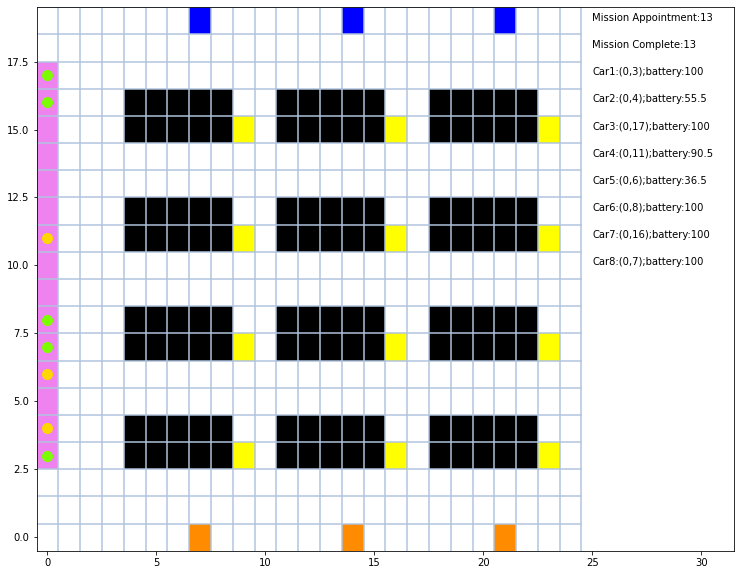

In [57]:
#模拟动画
for time in range(t + 1):
    fig = plt.figure(figsize=(12.5, 10))
    plt.clf()
    iw.animation(m, record, ar, cr, time)

plt.show()

In [49]:
record[2]

[[0, 7, 100, 0, 0],
 [0, 7, 100, 0, 0],
 [1, 6, 99.5, 0, 0],
 [1, 5, 99.0, 0, 0],
 [2, 4, 98.5, 0, 0],
 [3, 4, 98.0, 0, 0],
 [3, 3, 97.5, 0, 0],
 [4, 2, 97.0, 0, 0],
 [5, 1, 96.5, 0, 0],
 [5, 0, 96.0, 0, 0],
 [6, 0, 95.5, 0, 0],
 [7, 0, 95.0, 0, 0],
 [7, 0, 94.5, 1, 0],
 [8, 1, 93.5, 1, 0],
 [8, 2, 92.5, 1, 0],
 [9, 3, 91.5, 1, 0],
 [9, 4, 90.5, 1, 0],
 [9, 5, 89.5, 1, 0],
 [9, 6, 88.5, 1, 0],
 [10, 6, 87.5, 1, 0],
 [11, 6, 86.5, 1, 0],
 [12, 6, 85.5, 1, 0],
 [13, 6, 84.5, 1, 0],
 [14, 6, 83.5, 1, 0],
 [15, 6, 82.5, 1, 0],
 [16, 6, 81.5, 1, 0],
 [17, 6, 80.5, 1, 0],
 [18, 6, 79.5, 1, 0],
 [19, 6, 78.5, 1, 0],
 [20, 6, 77.5, 1, 0],
 [21, 6, 76.5, 1, 0],
 [22, 6, 75.5, 1, 0],
 [23, 7, 74.5, 1, 0],
 [23, 8, 73.5, 1, 0],
 [23, 9, 72.5, 1, 0],
 [23, 10, 71.5, 1, 0],
 [23, 11, 70.5, 1, 0],
 [23, 11, 69.5, 0, 0],
 [23, 11, 69.0, 0, 0],
 [24, 11, 68.5, 0, 0],
 [24, 10, 68.0, 0, 0],
 [23, 9, 67.5, 0, 0],
 [22, 9, 67.0, 0, 0],
 [21, 9, 66.5, 0, 0],
 [20, 9, 66.0, 0, 0],
 [19, 9, 65.5, 0, 0],
 [1

In [81]:
t

76

In [30]:
iw.writerecord(record, 'record_one_way.txt')

In [29]:
iw.writear_cr(ar, 'ar_one_way.txt')
iw.writear_cr(cr, 'cr_one_way.txt')

In [16]:
def getrecord(file = "record.txt"):
    f = open(file)
    record = [float(i) for i in f.read().split()]
    record = [[record[i], record[i+1], record[i+2], record[i+3], record[i+4]] for i in range(0,len(record) - 4,5)]
    t = int(len(record)/8)
    ans = [[],[],[],[],[],[],[],[]]
    for i in range(8):
        ans[i] = [record[j] for j in range(i*t,(i+1)*t)]
    return ans


def getr(file):
    f = open(file)
    record = [int(i) for i in f.read().split()]
    return record

In [17]:
ar = getr('ar.txt')
len(ar)

171

In [28]:
carall

[[15, 6, 46.0, 1, 7, 0, 16, 11, 1, 1, 0, 0],
 [0, 7, 97.5, 0, 0, 0, 0, 0, 0, 0, 2, 1],
 [18, 18, 50.5, 0, 0, 16, 0, 16, 0, 0, 1, 2],
 [0, 3, 70.0, 0, 0, 0, 0, 0, 0, 0, 2, 3],
 [7, 19, 48.0, 0, 0, 15, 0, 15, 0, 0, 1, 4],
 [23, 13, 51.0, 1, 21, 0, 23, 15, 1, 1, 0, 5],
 [8, 19, 49.5, 1, 23, 15, 7, 19, 1, 1, 0, 6],
 [1, 17, 53.5, 0, 0, 17, 0, 17, 0, 0, 1, 7]]

In [37]:
a=(2,3)

In [38]:
list(a)

[2, 3]